# Statistical Data Analysis Project -  Megaline Telecom

The goal of this project is to analyze clients' behavior and determine which prepaid plan brings in more revenue for Megaline telecom company.  To adjust the advertising budget, the commercial department of the company wants to find the more profitable plan, based on analysis of usage parameters and testing hypotheses regarding the plans revenue of 500 clietns sample.<br>
The analysis process outline:
- General information on data, decisions about addressing misising values, data types conversion, additional necessary information and merging tables.
- Processed data analysis - distributions of core paramteres for each group using histograms and statistical measures, and conclusions derived from the findings.
- Hypotheses testing using t-test and probability, overall conclusion and recommedations.


## General Knowledge

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
path = '/Data Analysis/Projects/'
data_users = pd.read_csv(path+'megaline_users.csv')
data_internet = pd.read_csv(path+'megaline_internet.csv')
data_messages = pd.read_csv(path+'megaline_messages.csv')
data_plans = pd.read_csv(path+'megaline_plans.csv')
data_calls = pd.read_csv(path+'megaline_calls.csv')

General knowledge of the datasets:

In [4]:
def info(dataset):
    print(dataset.info())
    display(dataset.head())

In [5]:
info(data_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [6]:
info(data_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [7]:
info(data_plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [8]:
info(data_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [9]:
info(data_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### conclusions and further steps
<br>
So far, there are some issues to be addressed: <br>
- The data consists of seveeral data sources, means merging tables is needed. <br>
- The date columns data type across the data sources should be converted to datetime type.<br>
- There's one column with missing values in users data - 'chur_date'.<br>
- The next step is data preprocessing - data types conversion, duplicates check, data merge where needed, addressing missing values, and creating the additional necessary columns.

## Data Preprocessing

### Fix data types
<br>
All the date column across the data sets are of object type, and should be converted to datetime type for further calculations. Additionally, the calls, messages and internet data require a month column for the next steps. Both will be done by this function:

In [10]:
def date_month(dataset,column):
    """
    This function takes dataset and column as parameters, converting to datatime type (by the format
    of the current data) and adding a column of month of year.
    """
    dataset[column] = pd.to_datetime(dataset[column], format='%Y-%m-%d')
    dataset['month'] = dataset[column].dt.month
    
date_month(data_calls,'call_date')
date_month(data_messages,'message_date')
date_month(data_internet,'session_date')

According to Megaline's charging policy, calls are rounded up to the nearest minute.<br>
Rounding up each individual call in the calls duration:

In [11]:
data_calls['duration'] = np.ceil(data_calls['duration'])

Looking for duplicates in the datasets:

In [12]:
data_sources = [data_users, data_calls, data_messages, data_internet]

for data in data_sources:
    print(data.duplicated().sum())

0
0
0
0


### Merging data

Merging the tables of calls, messages and internet to one table that contain all the useage parameters of each user per month, through grouping by user id and month, and find for each user's month the calls duration sum, number of mesaages, and amount of web traffic:

In [13]:
calls_group = data_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
calls_group.head(2)

,user_id,month,duration
0,1000,12,124.0
1,1001,8,182.0


In [14]:
messages_group = data_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_group = messages_group.rename(columns={'id' : 'messages'})
messages_group.head(2)

,user_id,month,messages
0,1000,12,11
1,1001,8,30


In [15]:
internet_group = data_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_group.head(2)

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15


Merging the tables using 'outer' join to keep all data of users and months, on the user id and month columns. Then filling in the missing values with zero, since a missing value in this case menas no use of the specific service in the related month.

In [16]:
from functools import reduce
data_frames = [calls_group, messages_group, internet_group]
usage_total = reduce(lambda left,right: pd.merge(
    left,right,on=['user_id', 'month'], how='outer'), data_frames).fillna(0)
info(usage_total)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   int64  
 1   month     2293 non-null   int64  
 2   duration  2293 non-null   float64
 3   messages  2293 non-null   float64
 4   mb_used   2293 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 107.5 KB
None


,user_id,month,duration,messages,mb_used
0,1000,12,124.0,11.0,1901.47
1,1001,8,182.0,30.0,6919.15
2,1001,9,315.0,44.0,13314.82
3,1001,10,393.0,53.0,22330.49
4,1001,11,426.0,36.0,18504.30


According to the charging policy, the month total of web traffic is rounded up to the nearest GB number.<br> 
Converting month total web traffic from MB to GB and Rounding up: 

In [17]:
usage_total['mb_used'] = np.ceil(usage_total['mb_used'] / 1024)
usage_total = usage_total.rename(columns={'mb_used' : 'gb_used'})
usage_total.head(2)

,user_id,month,duration,messages,gb_used
0,1000,12,124.0,11.0,2.0
1,1001,8,182.0,30.0,7.0


For calculation of monthly revenue from each user we need to add each user's plan column. Additionaly, the city data is required for the later stage of testing hypotheses, thus is added as well:

In [18]:
users_final =pd.merge(
    left=usage_total, right=data_users[['user_id', 'city', 'plan']], how='left', on='user_id')
info(users_final)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   int64  
 1   month     2293 non-null   int64  
 2   duration  2293 non-null   float64
 3   messages  2293 non-null   float64
 4   gb_used   2293 non-null   float64
 5   city      2293 non-null   object 
 6   plan      2293 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 143.3+ KB
None


,user_id,month,duration,messages,gb_used,city,plan
0,1000,12,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,315.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf


Calculating revenue and adding the monthly revenue column by this function applied to the final table:

In [19]:
def month_revenue(row):
    """
    This function calculates the revenue for each user by calling plan basic charge and extra uses
    difference from the package limit.
    """
    x=row['messages']
    y=row['duration']
    z=row['gb_used']
    p=row['plan']
    extra_text = 0
    extra_gb = 0
    extra_minutes = 0
    if p == 'surf':
        if x > 50:
            extra_text = (x-50) * 0.03
        if y > 500:
            exrta_minutes = (y - 500) * 0.03
        if z > 15:
            extra_gb = (z - 15) * 10
        total_rev_surf = extra_text + extra_minutes + extra_gb + 20
        return total_rev_surf
    elif p == 'ultimate':
        if x > 1000:
            extra_text = (x-1000) * 0.01
        if y > 3000:
            exrta_minutes = (y - 3000) * 0.01
        if z > 30:
            extra_gb = (z - 30) * 7
        total_rev_ultimate = extra_text + extra_minutes + extra_gb + 70
        return total_rev_ultimate

In [20]:
users_final['month_revenue'] = users_final.apply(month_revenue, axis=1)
users_final.head()

,user_id,month,duration,messages,gb_used,city,plan,month_revenue
0,1000,12,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,315.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00


### Missing values
<br>
The only column in the original datasets that contains missing values is 'churn_date', in the data_users dataset. The data in this column indicates the date of stop using the service, hence the null values are probably of customers who still use the service. Currently it seems there's no impact on the analysis, which is based on the merged table that doesn't contain missing values.<br>
The other issue regarding missing values was treated previously while merging the tables.

## Analyzing data
<br>
For investigation and analysis of users' behaviour, the final merged and processed table will be divided into two groups by the calling plan - 'surf' and 'ultimate':

In [21]:
surf_data = users_final.query('plan == "surf"')
ultimate_data = users_final.query('plan == "ultimate"')
surf_data.info()
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 1 to 2289
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        1573 non-null   int64  
 1   month          1573 non-null   int64  
 2   duration       1573 non-null   float64
 3   messages       1573 non-null   float64
 4   gb_used        1573 non-null   float64
 5   city           1573 non-null   object 
 6   plan           1573 non-null   object 
 7   month_revenue  1573 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 110.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        720 non-null    int64  
 1   month          720 non-null    int64  
 2   duration       720 non-null    float64
 3   messages       720 non-null    float64
 4   gb_used        7

As we see in the cell above, the Surf plan group is more than twice bigger than the Ultimate plan group. We should take this fact into consideration when testing the hypotheses with the two data samples.<br>
Moving on with the analysis, next task is study the core parameters for each plan - minutes, text, and volume of data per month. The distributions will be presented by histograms and boxplots, followed by mean, variance and standard deviation for each distribution, using the below function:

In [22]:
def hist_box(column):
    """
    This function takes a column (of core parameter) and creates histplot and boxplot for the two 
    plans in one chart. Then adds a table with the mean variance, and standard deviation. 
    """
    fig, axes = plt.subplots(1, 2, figsize=(16,5))
    sns.histplot(surf_data[column], ax=axes[0])
    sns.histplot(ultimate_data[column], ax=axes[0])
    sns.boxplot(x='plan', y=column, data=users_final, ax=axes[1])
    plt.show()

    surf_mean = surf_data[column].mean()
    surf_var = surf_data[column].var()
    surf_std = surf_data[column].std()
    ultimate_mean = ultimate_data[column].mean()
    ultimate_var = ultimate_data[column].var()
    ultimate_std = ultimate_data[column].std()

    stat_table = {'surf': [surf_mean, surf_var, surf_std],
                 'ultimate': [ultimate_mean, ultimate_var, ultimate_std]
                 }
    stat_data = pd.DataFrame(stat_table, index=['mean', 'var', 'std'])
    display(stat_data.style.format('{:.1f}'))

Histograms and boxplot to show distributions:

Calls duration:

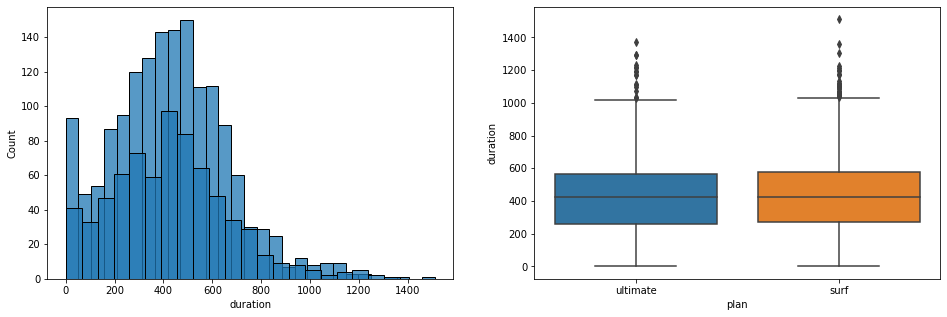

,surf,ultimate
mean,428.7,430.4
var,54968.3,57844.5
std,234.5,240.5


In [23]:
hist_box('duration')

Number of text messages:

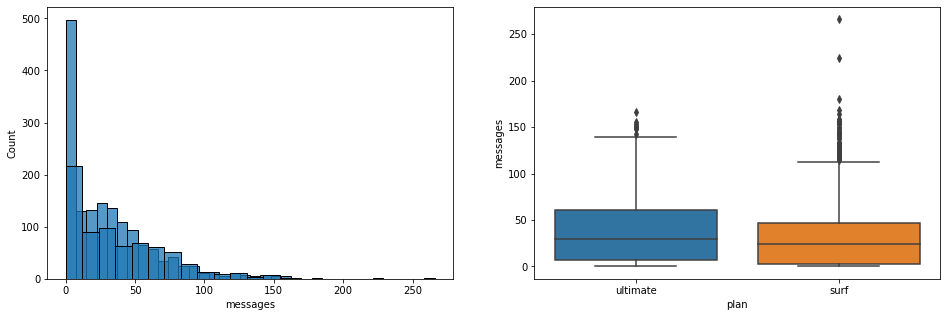

,surf,ultimate
mean,31.2,37.6
var,1126.7,1208.8
std,33.6,34.8


In [24]:
hist_box('messages')

Web traffic:

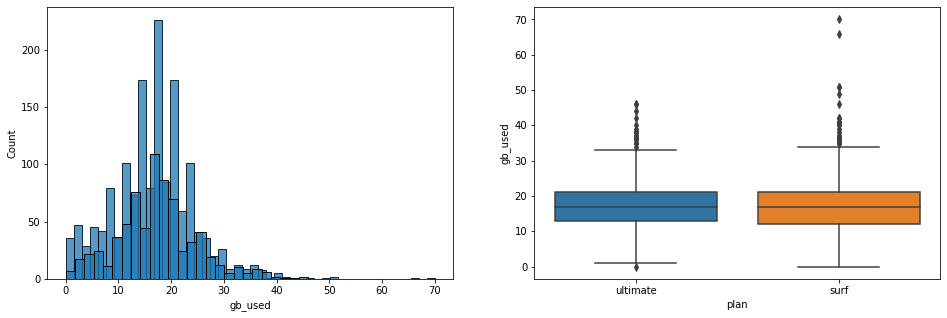

,surf,ultimate
mean,16.7,17.3
var,61.6,58.8
std,7.8,7.7


In [25]:
hist_box('gb_used')

The distributions presented in the histograms and boxplots above, shows a right-skewed distribution for 2 parameters - calls duration and number of text messages. The third parameter's distribution - web traffic - is closer to normal. For all the parameters above, the two plans sahre a similar shape for each parameter, while in all cases the frequencies of Surf group (bright blue in histogram) are higher than the Ultimate group (dark blue in histogram). This finding is not surprising as the Surf users amount is more than twice the amount of the Ultimate users. <br>
The boxplots support this finding, though the Surf plan plots show more extreme outliers. <br>
The similarity between the charts shapes of the two plans is represented also in the attached statistics measures tables. <br>That is, the users' behavior regarding the three investigated parameters is pretty much the same for both plans.    

## Testing the hypotheses

The null hypotheses (H0) are:
- There's equality in the average revenue from users of the plans.
- There's equality in the average revenue from users in NY-NJ area and the others.<br>

Since the null hypotheses stand for equality, the alternative hypotheses (H1) are: 
- The average revenue from users of Ultimate and Surf calling plans differs.
- The average revenue from users in NY-NJ area is different from that of the users from other regions.

In order to determine whether we can reject the null hypothesis or not, a threshold for statistical significance - Alpha value - is set to the common value of 0.05.
Since the 'Surf' plan users amount is more than twice the amount of 'Ultimate' plan users, a random sample of 720 users will respresent the 'surf' group, so that we run the test for groups of the same size.<br>
In order to determine which value of equal_var to use in the t-test, we check if there's equality in samples variances using Levene's test.<br>
Then creating a function and start testing the first null hypothesis:

In [26]:
levene_rev = st.levene(surf_data['month_revenue'], ultimate_data['month_revenue'])
print('p-value:', levene_rev.pvalue)
if levene_rev.pvalue < 0.05:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 3.2988275690354503e-84
We reject the null hypothesis


In the case of monthly revenue, based on the results of Levene's test, we reject the null hypothesis, namely the low p-value indicates no equality in variances of the two plans month revenue. Thus we set the equal_var to False in the plans samples t-test.

In [27]:
def ttest(sample_1, sample_1_size, sample_2, equal_variance=True):
    """
    This function takes 2 samples and the desired size for the first (bigger) sample, runs t-test
    for the samples, returns p-value and whether is smaller than the statistical threshold or not.
    """
    sample_1 = sample_1.sample(n=sample_1_size)
    alpha = 0.05
    results = st.ttest_ind(sample_1, sample_2, equal_var=equal_variance)
    print('p-value:', results.pvalue)
    if results.pvalue < alpha:
        print('We reject the null hypothesis')
    else:
        print("We can't reject the null hypothesis")

In [28]:
ttest(surf_data['month_revenue'], 720, ultimate_data['month_revenue'], False)

p-value: 1.4655619174575906e-09
We reject the null hypothesis


The first null hypothesis is rejected. The P-value is far below the statistical threshold, means a statistically significant difference between the averages of the month revenue from 'surf' and 'ultimate' plans.<br>
Now testing the second null hypothesis. <br>
For this task we'll devide the data into two tables - users from NY-NJ area and all the other regions. <br>
Retrieving all the rows where 'NY-NJ' is included in the srting of 'city', to create the New-Yorkers group:

In [29]:
NY_NJ_users = users_final[users_final['city'].str.contains('NY-NJ')]
NY_NJ_users.head()
len(NY_NJ_users)

,user_id,month,duration,messages,gb_used,city,plan,month_revenue
56,1014,11,163.0,9.0,2.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20.00
57,1014,12,1114.0,64.0,8.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20.42
75,1022,5,302.0,0.0,5.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20.00
76,1022,6,490.0,0.0,23.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,100.00
77,1022,7,475.0,0.0,10.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20.00


377

Other regions data, where the previous condition is False:

In [30]:
not_NY_users = users_final[users_final['city'].str.contains('NY-NJ') == False]
not_NY_users.head()
len(not_NY_users)

,user_id,month,duration,messages,gb_used,city,plan,month_revenue
0,1000,12,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,315.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00


1916

Levene's test for the different area samples:

In [31]:
levene_area = st.levene(not_NY_users['month_revenue'], NY_NJ_users['month_revenue'])
print('p-value:', levene_area.pvalue)
if levene_area.pvalue < 0.05:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.13328077308433875
We can't reject the null hypothesis


With regard to month revenue by areas, we can't reject the null hypothesis. The p-value is above the 0.05 thershold, means we can't reject equality between samples variances, and use the default True value for equal_var.

Calling the ttest function and running the t-test with the new samples, using random sample of 377 users (for equal sample sizes) from the bigger group - not NY users:

In [32]:
ttest(not_NY_users['month_revenue'], 377, NY_NJ_users['month_revenue'])

p-value: 0.40935199056909854
We can't reject the null hypothesis


In this case we can't reject the null hypothesis. In this case the P-value is above the threshold, indicating a probability of more than 5%.  

## Overall conclusion



This project purpose was to analyze behavior of Megaline telecom company users, and determine which of the company's plans bring in higher revenues. <br>
Preprocessing stage included converting data type of date columns, rounding values according to the charging policy, adding columns of month and appropriately grouping data to find monthly usage parameters for each user. Then merging the tables, and treating missing values resulted from merging.

Analysis showed quite similar distributions (mostly right-skewed) for the parameters - calls duration, messages sent, and web traffic - when comparing distributions in histograms between the two plans. The mean, variance and standard deviation were calculated For each plan in each parameter. The results showed that the mean values of the Ultimate plan were higher than Surf plan in every parameter. In reagrd to variance and standard deviation, Surf plan showed higher values only in web traffic parameter.

Finally we tested the null hypotheses. <br>
The first hypothesis states equality in the average revenue from users of the two plans. This null hypothesis was rejected, thus the average revenue from users of Ultimate and Surf calling plans differs (although it is not proven only by rejecting the null hypothesis).<br>
The second hypothesis states equality in the average revenue from users in NY-NJ area and the others. In this case we couldn't reject the null hypothesis, which means no statistically significant difference in average revenue from NY-NJ area and the others.